<a href="https://colab.research.google.com/github/yantiputri/SEMESTER-3/blob/main/praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Praktikum_ml/praktikum11'

## Loading Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ml/praktikum11/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Menampilkan informasi detail

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Cek Missing Value dan Data Duplikat

In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Cek variasi spesiesnya

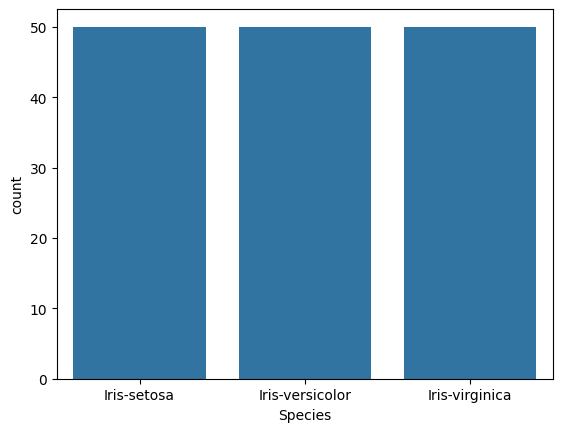

In [ ]:
sns.countplot(x="Species", data=df)
plt.show()

Menampilkan statistika deskriptif dari dataset

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Cek nilai pada kolom Species

In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Menghitung jumlah pada kolom Species

In [ ]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Pemilihan Fitur

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

In [ ]:
# Fitur untuk clustering
X = df.drop(["Species", "SpeciesEncoded"], axis=1)

In [ ]:
X[7:15]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1
10,11,5.4,3.7,1.5,0.2
11,12,4.8,3.4,1.6,0.2
12,13,4.8,3.0,1.4,0.1
13,14,4.3,3.0,1.1,0.1
14,15,5.8,4.0,1.2,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

#Normalisasi data menggunakan standarScaler
scaler = StandardScaler()

X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Menentukan Jumlah Cluster (K) dengan Elbow Method

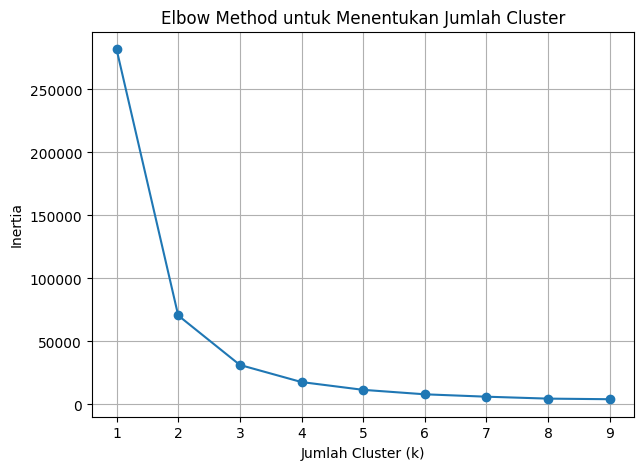

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o' )
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## Membangun Model K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
n_clusters=3,
init="k-means++",
random_state=42
)

In [ ]:
df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [2 0 1]


## Evaluasi Kualitas Clustering

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n ===== SILHOUETTE SCORE ===== ")
print("Silhouette Score:", sil_score)


 ===== SILHOUETTE SCORE ===== 
Silhouette Score: 0.5816702617893469


## Confusion Matrix (Perbandingan dengan Label Asli)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n ===== CONFUSION MATRIX ===== ")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


 ===== CONFUSION MATRIX ===== 
[[ 1  0 49]
 [49  1  0]
 [ 0 50  0]]


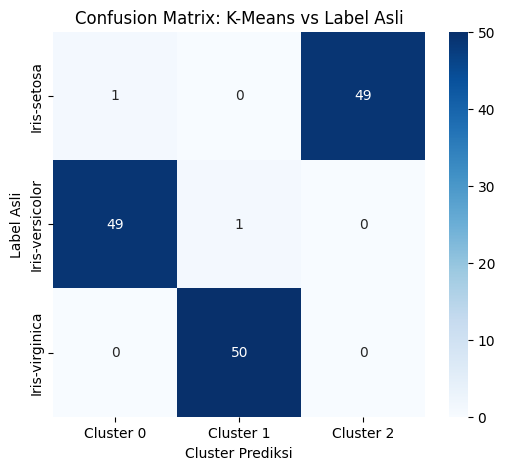

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)

plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

## 2D dan 3D Visualisasi Hasil Model K-Means

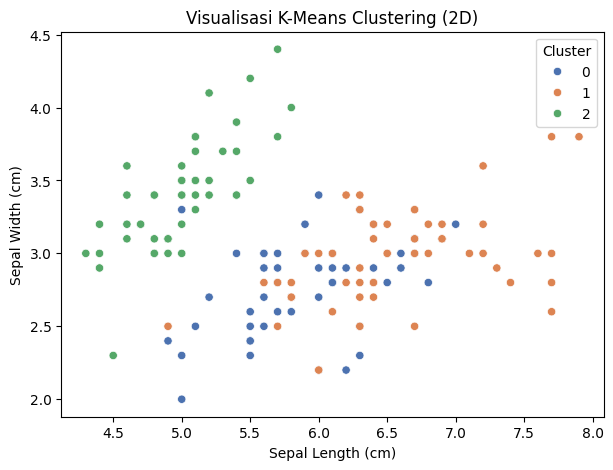

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)

plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

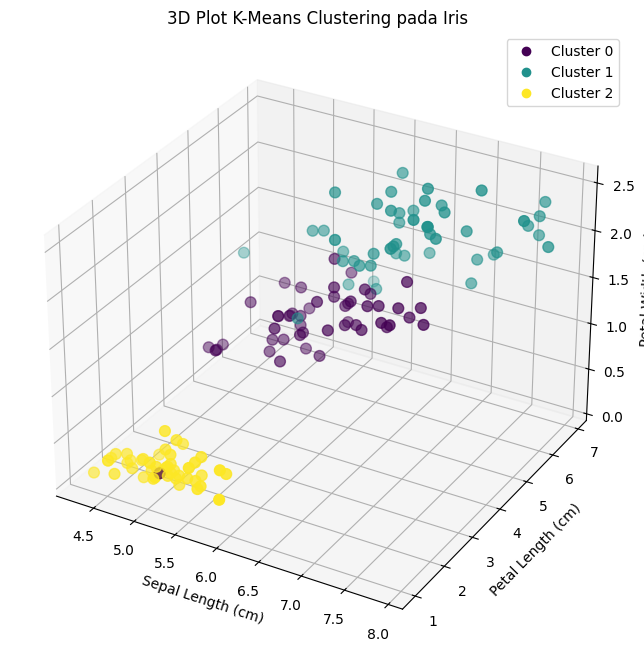

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d' )

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements() [0], labels=legend_labels)

plt.show()